# Superstore Sales Analysis

<img src="busy-shopping-mall.jpg" alt="Person Holding Groceries" width = "400">


## Context

In the competitive retail industry, understanding sales performance and customer behavior is critical for strategic decision-making and sustained business growth. Superstores, which offer a wide range of products across various categories, generate vast amounts of transactional data daily. Analyzing this data provides valuable insights into sales trends, customer preferences, and operational efficiencies.

The Superstore Sales Analysis project focuses on examining sales data from a hypothetical retail superstore. This dataset typically includes information on sales transactions, product categories, customer demographics, and regional sales performance. By performing a comprehensive analysis of this data, we aim to uncover patterns and trends that can inform business strategies, such as inventory management, marketing campaigns, and customer segmentation.

## Business Problem

The retail superstore industry operates in a highly competitive environment where understanding and responding to market dynamics is crucial for maintaining a competitive edge. Despite having access to vast amounts of transactional data, many superstores struggle to effectively leverage this information to drive strategic decisions. 

## Objective

In this project, we leverage the power of Pandas and Matplotlib to conduct an in-depth analysis of three years' worth of sales data from a superstore. This dataset comprises thousands of store transactions, detailed by order date, product type, cost, and more.

Our primary objective is to uncover actionable business insights by addressing the following key questions:

1. What is the overall sales trend?
2. Which are the Top 10 products by sales?
3. Which products are the most sold?
4. What is the most preferred ship mode?
5. Which categories and sub-categories are the most profitable?

Through meticulous data wrangling and visualization techniques, we aim to provide a comprehensive overview of sales performance and strategic recommendations for business growth.

In [1]:
import pandas as pd
df = pd.read_excel('superstore_sales.xlsx')

In [2]:
# set to see all cols in df
pd.set_option('display.max_columns', 25)

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


## Data Cleaning

In [4]:
# drop year col since it is the year of order_date
df[df['order_date'].dt.year == df["year"]]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [5]:
df.drop(columns="year", inplace=True)

In [6]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium


In [7]:
df.info()
# all dtypes are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
# no nulls
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

In [9]:
# no duplicates
df.duplicated().sum()

0

# Exploratory Data Analysis

### Q1. What is the overall sales trend?

In [10]:
# earliest order date 
df["order_date"].min()

Timestamp('2011-01-01 00:00:00')

In [11]:
# latest order date
df["order_date"].max()

Timestamp('2014-12-31 00:00:00')

In [12]:
# Get month and year from dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [13]:
# Group by month_year and sum up sales per group 
df_trend = df.groupby('month_year').sum(numeric_only=True)['sales'].reset_index()

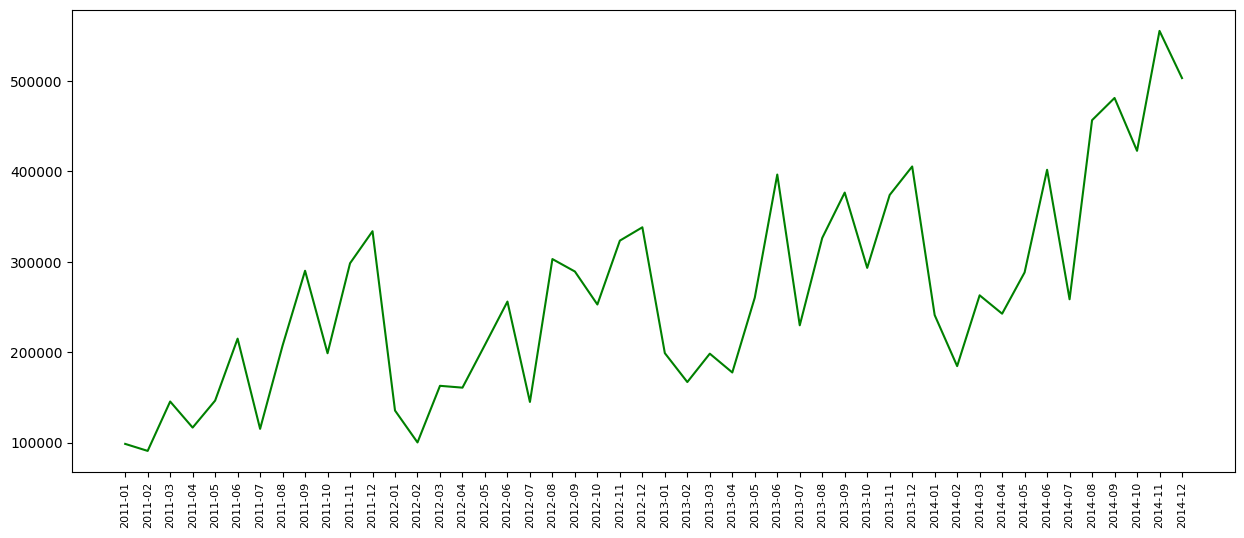

In [14]:
import matplotlib.pyplot as plt

# Set figsize
plt.figure(figsize=(15,6))
# Line plot
plt.plot(df_trend['month_year'], df_trend['sales'], color='green')
plt.xticks(rotation='vertical', size=8)


plt.show()

The line plot shows a cyclic pattern over the three-year period, with peaks occurring around June, September, and December, and troughs around February, July, and October.

### Q2. Which are the Top 10 products by sales?


In [15]:
prod_sales = df.groupby('product_name')['sales'].sum().reset_index().set_index('product_name')

In [16]:
prod_sales.sort_values(by = "sales",ascending=False)[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


From the top 10 products by sales, we observe that full-sized smartphones are the top-sellers, followed by an advanced copier model and adjustable executive leather armchairs.

### Q3. Which are the Most Selling Products?


In [17]:
prod_quant = pd.DataFrame(df.groupby('product_name')['quantity'].sum())
prod_quant

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [18]:
prod_quant.sort_values(by = "quantity",ascending=False)[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


The table reveals that the top 10 most selling products by quantity are all office-related items. This suggests that customers predominantly purchase products for office work, school, or home desk setups.

The top 10 most selling products by quantity are all office related items. This suggests that customers generally buy products related to working in the office, school, or perhaps for their home desk. 

### Q4. Which is the most preferred Ship Mode?


In [19]:
ship_mode_value_counts = df.groupby('ship_mode').size().reset_index().sort_values(by=0, ascending=False)
ship_mode_value_counts.columns = ['ship_mode','count']
ship_mode_value_counts

,ship_mode,count
3,Standard Class,30775
2,Second Class,10309
0,First Class,7505
1,Same Day,2701


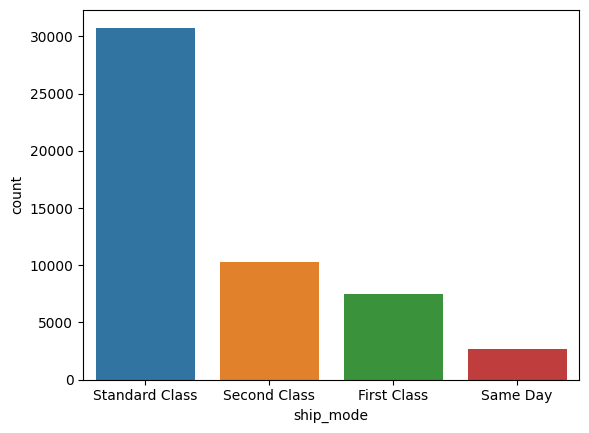

In [20]:
import seaborn as sns
# plotting the ship mode counts
sns.barplot(ship_mode_value_counts, x='ship_mode',y='count')
plt.show()

The bar chart shows that Standard Class is overwhelmingly the most popular shipping method for online purchases, with over 30,000 shipments.

### Q5. Which are the Most Profitable Category and Sub-Category?

In [21]:
cat_sub_profit = pd.DataFrame(df.groupby(['category','sub_category'])['profit'].sum())

In [22]:
# sort within category and order by profit
cat_sub_profit.sort_values(by=["category","profit"], ascending=[True,False])

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300

The table indicates that the most profitable category is technology, with the sub-category of copiers generating the highest profit. On the other hand, the least profitable category is furniture, with tables in particular showing a negative profit.

## Overall Findings

1. **Consistent Sales Trends**: Over the three-year period, sales have exhibited a consistent trend, peaking and declining around the same months each year. This pattern highlights predictable seasonal variations in customer purchasing behavior.

2. **Top Selling Products**: Smartphones and armchairs have emerged as the leading products in terms of sales, indicating high consumer demand and popularity for these items.

3. **High Volume Products**: Office supplies are the most frequently sold products, reflecting a steady and ongoing demand for these essential items.

4. **Preferred Shipping Method**: Standard class shipping is the most commonly used shipping method in the superstore, suggesting it meets the needs and preferences of the majority of customers.

5. **Profitability Insights**: The technology category stands out as the most profitable, generating significant revenue. In contrast, the furniture category, particularly tables, has been identified as the least profitable, indicating potential areas for cost reduction or strategic adjustments.

## Recommendations

### Seasonal Sales Optimization
- **Prepare for Fluctuations**: With a recurring trend each year, the superstore can anticipate seasonal fluctuations. Increase inventory and marketing efforts during peak months (June, September, and December) to maximize sales. Implement cost-saving measures and promotions during slower months to stimulate sales.
- **Targeted Promotional Campaigns**: Plan and execute targeted promotional campaigns before and during peak sales periods to capitalize on increased consumer spending.

### Product Focus and Inventory Management
- **Stock Top-Selling Items**: Ensure ample stock of top-selling products, such as smartphones and armchairs, especially during peak months. Consider offering accessories or related products for smartphones and providing discounts to drive sales.
- **Optimize Office Supplies Inventory**: Maintain a substantial inventory of office supplies, the most popular product category. Feature the most in-demand office supplies prominently both in-store and online.

### Shipping and Logistics
- **Optimize Standard Class Shipping**: Ensure that Standard class shipping remains cost-effective and efficient, as it is the preferred method. Identify areas for improvement to enhance delivery times and reduce costs.
- **Offer Shipping Promotions**: Consider offering free or discounted shipping for Standard Class during peak sales periods to incentivize customer purchases.

### Profitability Enhancement
- **Expand Technology Product Range**: Since technology is the most profitable category, consider expanding the range of tech products offered. Explore partnerships with popular tech brands to attract tech-savvy customers.
- **Re-evaluate Furniture Inventory**: Given that furniture, especially tables, is the least profitable category, reassess the need to keep certain items in inventory. Explore bundling opportunities with other furniture items to boost sales.

### Customer Experience and Marketing
- **Analyze Customer Feedback**: Gather and analyze customer feedback related to top-selling and low-performing products. Utilize this information to enhance product offerings and customer service.
- **Personalized Marketing**: Based on customer preferences and purchasing behavior, deploy personalized email campaigns and targeted social media advertising to reach specific customer segments.
